In [86]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Housing.csv')

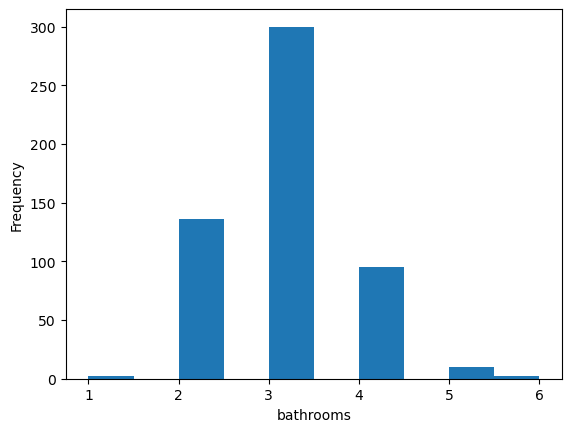

In [87]:
import matplotlib.pyplot as plt

# Example: Histogram of a numeric variable
plt.hist(df['bedrooms'], bins=10)
plt.xlabel('bathrooms')
plt.ylabel('Frequency')
plt.show()

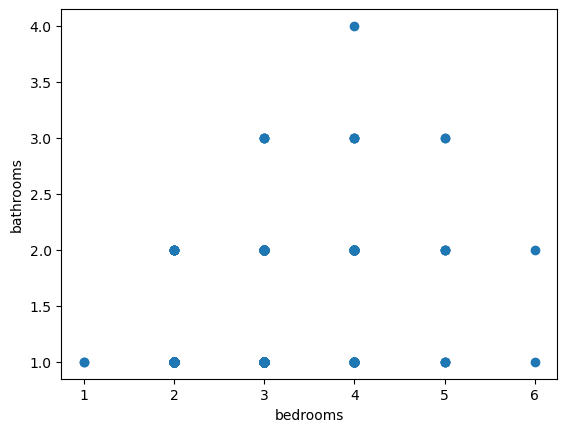

In [88]:
# Example: Scatter plot of two numeric variables
plt.scatter(df['bedrooms'], df['bathrooms'])
plt.xlabel('bedrooms')
plt.ylabel('bathrooms')
plt.show()

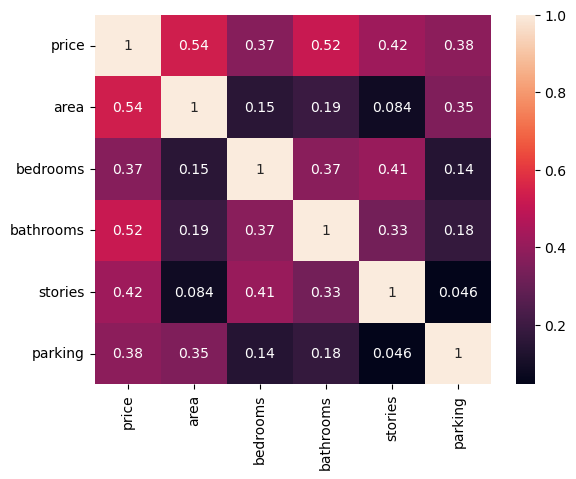

In [89]:
import seaborn as sns

# Example: Heatmap of correlation matrix
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [90]:
# Example: Descriptive statistics of numeric variables
descriptive_stats = df.describe()
print(descriptive_stats)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [91]:
# Example: Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Example: Deal with missing values by dropping rows with missing values
df = df.dropna()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [92]:
# Example: Identify outliers using the z-score method
from scipy.stats import zscore

z_scores = zscore(df['bedrooms'])
outliers = df[abs(z_scores) > 3]

# Example: Replace outliers with the median value
median_value = df['bedrooms'].median()
df.loc[abs(z_scores) > 3, 'bedrooms'] = median_value

In [93]:
# Example: Check for categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Example: Perform one-hot encoding using pandas get_dummies
encoded_df = pd.get_dummies(df[categorical_columns], drop_first=True)
df = pd.concat([df, encoded_df], axis=1)

In [94]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0})

In [131]:
# Example: Split into dependent and independent variables
X = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','furnishingstatus']]  # Independent variables
y = df['price']  # Dependent variable

In [120]:
X=X.fillna(1)

In [122]:
# Example: Check for missing values
missing_values = X.isnull().sum()
print(missing_values)

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [132]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline with an imputer and LinearRegression
pipeline = make_pipeline(SimpleImputer(), LinearRegression())

# Fit the model on the data
pipeline.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [133]:
# Example: Standardize independent variables using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
# Example: Split into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [126]:
# Example: Build a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [135]:
# Example: Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [137]:
# Example: Make predictions on the test data
y_pred = model.predict(X_test)

In [134]:
# Example: Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)